<a href="https://colab.research.google.com/github/huramire/PyoyectoBanco2022/blob/main/ProyectoCedesistemasSerieFinancieraJPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Librerias**

In [58]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import plotly.express as px
import pandas_datareader as wb

#**Traer Información**

In [60]:
today =  datetime.today().strftime("%Y-%m-%d")
today

'2022-07-22'

In [61]:
inicio="2017-01-01"
ticker="JPM"
df= wb.DataReader(ticker,"yahoo",inicio,today)

In [62]:
df.shape

(1398, 6)

#**Filtros**

In [63]:
df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,87.76,85.98,87.34,87.23,20550700.00,74.44
2017-01-04,87.18,86.40,86.96,86.91,15266600.00,74.57


In [64]:
df["2016":"2017"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,87.76,85.98,87.34,87.23,20550700.00,74.44
2017-01-04,87.18,86.40,86.96,86.91,15266600.00,74.57
2017-01-05,87.11,85.26,86.81,86.11,14300800.00,73.89
2017-01-06,86.62,85.94,86.39,86.12,12893300.00,73.90
2017-01-09,86.77,85.52,85.73,86.18,12806600.00,73.95
...,...,...,...,...,...,...
2017-12-22,108.46,106.81,108.20,107.45,14573400.00,93.78
2017-12-26,107.99,106.40,107.20,107.02,7403700.00,93.41
2017-12-27,107.29,106.67,106.67,107.22,9496500.00,93.58


#**Solo una fecha**

In [65]:
pd.options.display.float_format = '{:.2f}'.format
df.loc["2017-12-22"]

High             108.46
Low              106.81
Open             108.20
Close            107.45
Volume      14573400.00
Adj Close         93.78
Name: 2017-12-22 00:00:00, dtype: float64

#**Precio del cierre de mes**

In [66]:
df.asfreq("M",method="ffill")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-31,86.15,84.09,85.60,84.63,15655100.00,72.62
2017-02-28,90.82,89.59,89.85,90.62,15183500.00,77.76
2017-03-31,88.74,87.75,88.71,87.84,16987600.00,75.37
2017-04-30,87.85,86.95,87.60,87.00,10755600.00,75.08
2017-05-31,83.82,81.64,83.73,82.15,28327900.00,70.89
...,...,...,...,...,...,...
2022-02-28,145.06,140.88,143.55,141.80,31315300.00,139.52
2022-03-31,140.35,136.26,139.83,136.32,17353900.00,134.13
2022-04-30,123.61,118.90,123.05,119.36,14874800.00,118.31


#**Días hábil**

In [67]:
df.asfreq("BM")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-31,86.15,84.09,85.60,84.63,15655100.00,72.62
2017-02-28,90.82,89.59,89.85,90.62,15183500.00,77.76
2017-03-31,88.74,87.75,88.71,87.84,16987600.00,75.37
2017-04-28,87.85,86.95,87.60,87.00,10755600.00,75.08
2017-05-31,83.82,81.64,83.73,82.15,28327900.00,70.89
...,...,...,...,...,...,...
2022-02-28,145.06,140.88,143.55,141.80,31315300.00,139.52
2022-03-31,140.35,136.26,139.83,136.32,17353900.00,134.13
2022-04-29,123.61,118.90,123.05,119.36,14874800.00,118.31


#**Trimestrales**

In [68]:
df.asfreq("BQ")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-31,88.74,87.75,88.71,87.84,16987600.00,75.37
2017-06-30,92.00,91.16,91.96,91.40,16892700.00,78.88
2017-09-29,95.52,95.02,95.30,95.51,11438400.00,82.88
2017-12-29,108.28,106.94,108.09,106.94,8925700.00,93.34
2018-03-30,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-29,106.90,104.15,106.68,104.20,18972400.00,91.88
2018-09-28,114.24,112.52,113.65,112.84,15815100.00,100.04
2018-12-31,98.81,96.77,97.59,97.62,13237200.00,87.16
2019-03-29,101.99,100.59,101.54,101.23,14523400.00,91.11


#**Gráfico Sencillo**

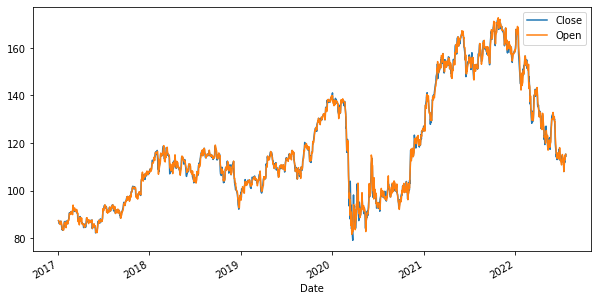

In [69]:
df[["Close","Open"]].plot(figsize=(10,5))
plt.show()

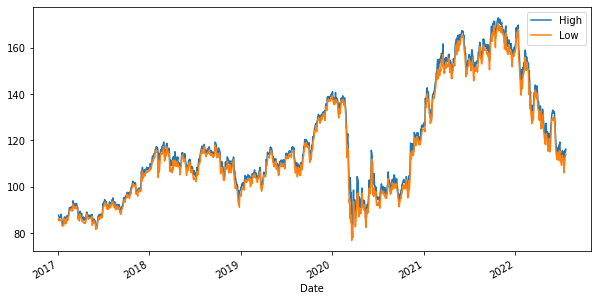

In [70]:
df[["High","Low"]].plot(figsize=(10,5))
plt.show()

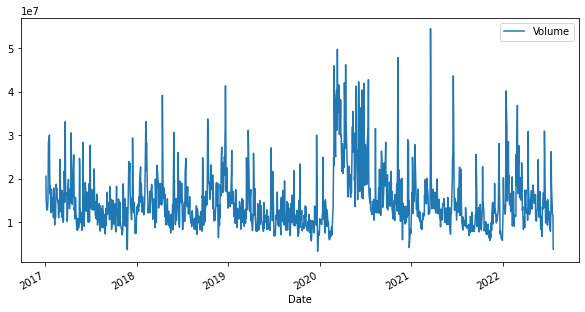

In [71]:
df[["Volume"]].plot(figsize=(10,5))
plt.show()

#**Retornos Financieros**

In [72]:

VariacionDiaria=df["Close"]/df["Close"].shift(1)-1

In [73]:
df["Retornos"]=VariacionDiaria

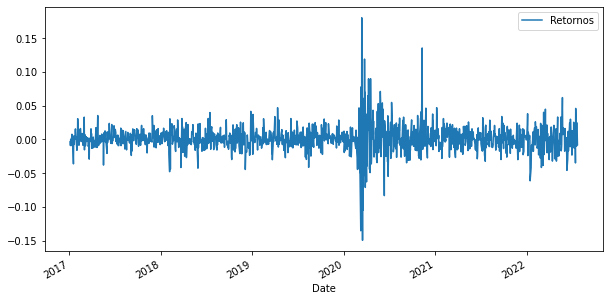

In [74]:
df[["Retornos"]].plot(figsize=(10,5))
plt.show()

In [75]:
df[["Retornos"]].describe()

,Retornos
count,1397.00
mean,0.00
std,0.02
min,-0.15
25%,-0.01
50%,-0.00
75%,0.01
max,0.18


#**Grafica con Plotly**

In [76]:
fig=px.line(df,y="Close",title="Evolución Diaria Precio de Acción de JP Morgan")
fig.update_xaxes(rangeslider_visible=True)
## Botones
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [77]:
import statsmodels.api as sm 
from pylab import rcParams

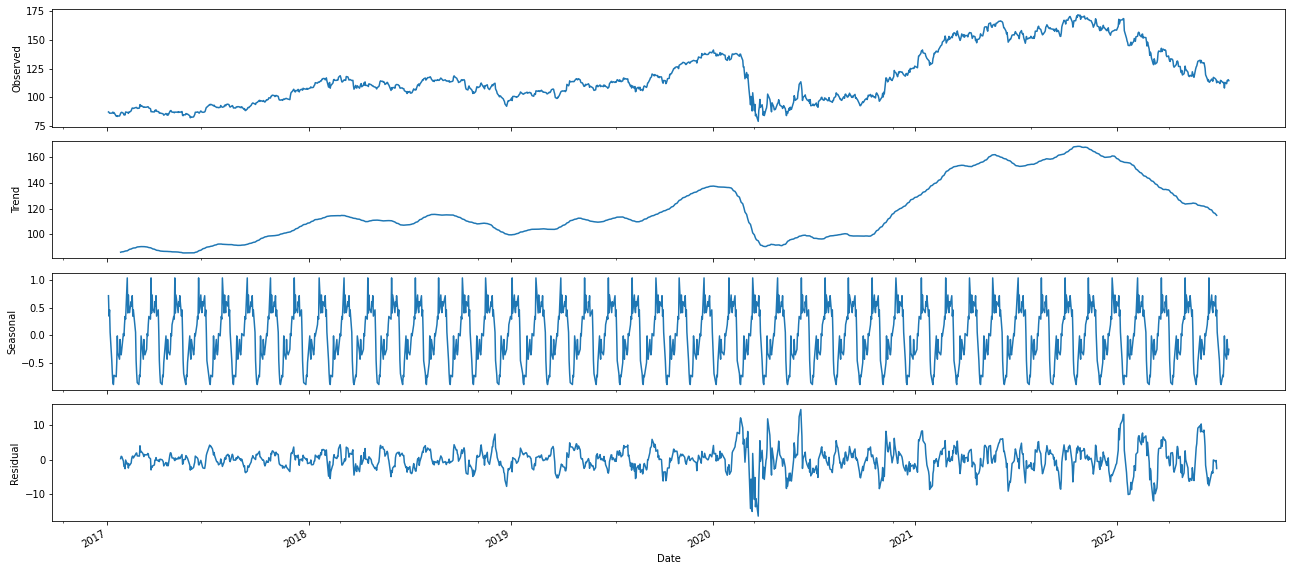

In [78]:
rcParams["figure.figsize"]=18,8
descomposicion= sm.tsa.seasonal_decompose(df["Close"],model="additive",freq=30)
fig = descomposicion.plot()

#**Dia Semana, Dia mes, Year**

In [79]:
df.head(2)

,High,Low,Open,Close,Volume,Adj Close,Retornos
Date,,,,,,,
2017-01-03,87.76,85.98,87.34,87.23,20550700.00,74.44,NaN
2017-01-04,87.18,86.40,86.96,86.91,15266600.00,74.57,-0.00


In [80]:
df["Fecha"]=df.index

In [81]:
df.head(6)

,High,Low,Open,Close,Volume,Adj Close,Retornos,Fecha
Date,,,,,,,,
2017-01-03,87.76,85.98,87.34,87.23,20550700.00,74.44,NaN,2017-01-03
2017-01-04,87.18,86.40,86.96,86.91,15266600.00,74.57,-0.00,2017-01-04
2017-01-05,87.11,85.26,86.81,86.11,14300800.00,73.89,-0.01,2017-01-05
2017-01-06,86.62,85.94,86.39,86.12,12893300.00,73.90,0.00,2017-01-06
2017-01-09,86.77,85.52,85.73,86.18,12806600.00,73.95,0.00,2017-01-09
2017-01-10,86.90,85.72,86.07,86.43,13989000.00,74.16,0.00,2017-01-10


In [82]:
# Dia semana
dw_mapping={
    0: 'Lunes', 
    1: 'Martes', 
    2: 'Miércoles', 
    3: 'Jueves', 
    4: 'Viernes',
    5: 'Sábado', 
    6: 'Domingo'}
df["DiaSemana"]=df.Fecha.dt.weekday.map(dw_mapping)

In [83]:

## Mes
dw_mapping={
    "01": 'Enero', 
    "02": 'Febrero', 
    "03": 'Marzo', 
    "04": 'Abril', 
    "05": 'Mayo',
    "06": 'Junio', 
    "07": 'Julio',
    "08": "Agosto",
    "09": "Septiembre",
    "10": "Octubre",
    "11":"Noviembre",
    "12": "Noviembre"}
df["Mes"]=df.Fecha.dt.strftime('%m').map(dw_mapping)

#**Modelo Mensual**

In [84]:
y=df["Close"].resample("M").mean()

In [85]:
y

Date
2017-01-31    85.61
2017-02-28    88.63
2017-03-31    90.15
2017-04-30    86.29
2017-05-31    85.95
              ...  
2022-03-31   136.74
2022-04-30   129.05
2022-05-31   122.93
2022-06-30   119.95
2022-07-31   113.13
Freq: M, Name: Close, Length: 67, dtype: float64

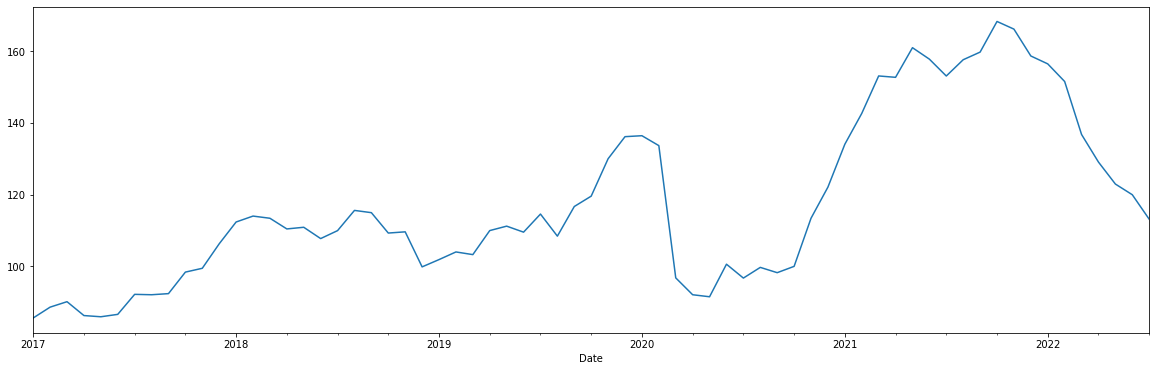

In [86]:
y.plot(figsize=(20,6))
plt.show()

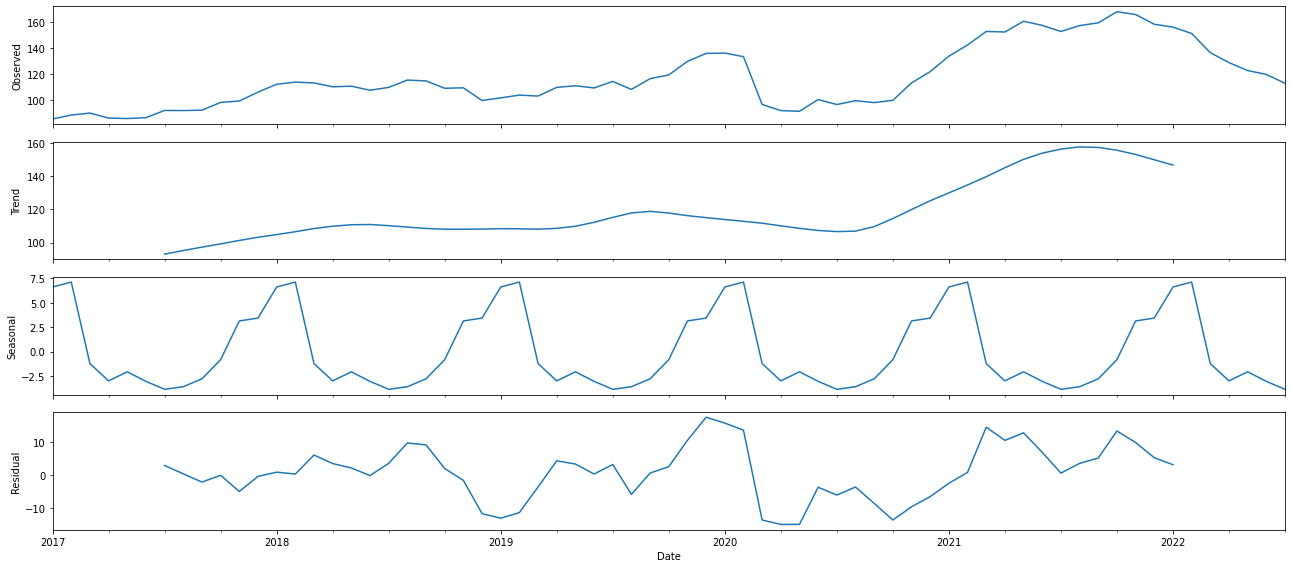

In [87]:
rcParams["figure.figsize"]=18,8
descomponer=sm.tsa.seasonal_decompose(y,model="additive")
fig=descomponer.plot()

#**Suponer que es un SARIMA**

In [88]:
def Optimizacion_SARIMA(y):
  import itertools
  p=d=q=range(0,2)
  pdq=list(itertools.product(p,d,q))

  seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,q,d))]

  p1=[]
  p2=[]
  p3=[]

  for param in pdq:
      for param_seasonal in seasonal_pdq:
          try:
              mod=sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
              results=mod.fit()
              p1.append(param)
              p2.append(param_seasonal)
              p3.append(results.aic)
          except:
              continue
  df1 = pd.DataFrame({'param' : p1, 'param_seasonal' :p2,"results.aic":p3})
  td=df1[df1["results.aic"]==min(p3)]
  return td

#**Entrenar el Modelo**

##**Dividir en Train y Test**

In [89]:

y=df["Close"].resample("M").mean()

In [90]:
y

Date
2017-01-31    85.61
2017-02-28    88.63
2017-03-31    90.15
2017-04-30    86.29
2017-05-31    85.95
              ...  
2022-03-31   136.74
2022-04-30   129.05
2022-05-31   122.93
2022-06-30   119.95
2022-07-31   113.13
Freq: M, Name: Close, Length: 67, dtype: float64

##**Train**

In [91]:
y_train=y["2017-01-31":"2021-06-30"]
y_train

Date
2017-01-31    85.61
2017-02-28    88.63
2017-03-31    90.15
2017-04-30    86.29
2017-05-31    85.95
2017-06-30    86.62
2017-07-31    92.20
2017-08-31    92.09
2017-09-30    92.40
2017-10-31    98.39
2017-11-30    99.46
2017-12-31   106.28
2018-01-31   112.35
2018-02-28   114.00
2018-03-31   113.40
2018-04-30   110.42
2018-05-31   110.89
2018-06-30   107.73
2018-07-31   109.95
2018-08-31   115.58
2018-09-30   114.95
2018-10-31   109.28
2018-11-30   109.61
2018-12-31    99.85
2019-01-31   101.88
2019-02-28   104.01
2019-03-31   103.27
2019-04-30   109.96
2019-05-31   111.20
2019-06-30   109.53
2019-07-31   114.57
2019-08-31   108.41
2019-09-30   116.67
2019-10-31   119.56
2019-11-30   129.98
2019-12-31   136.13
2020-01-31   136.40
2020-02-29   133.64
2020-03-31    96.78
2020-04-30    92.09
2020-05-31    91.52
2020-06-30   100.59
2020-07-31    96.73
2020-08-31    99.71
2020-09-30    98.23
2020-10-31    99.99
2020-11-30   113.40
2020-12-31   122.08
2021-01-31   134.02
2021-02-28   14

In [92]:
y_test=y["2021-07-31":]
y_test

Date
2021-07-31   153.03
2021-08-31   157.57
2021-09-30   159.69
2021-10-31   168.23
2021-11-30   166.10
2021-12-31   158.61
2022-01-31   156.41
2022-02-28   151.50
2022-03-31   136.74
2022-04-30   129.05
2022-05-31   122.93
2022-06-30   119.95
2022-07-31   113.13
Freq: M, Name: Close, dtype: float64

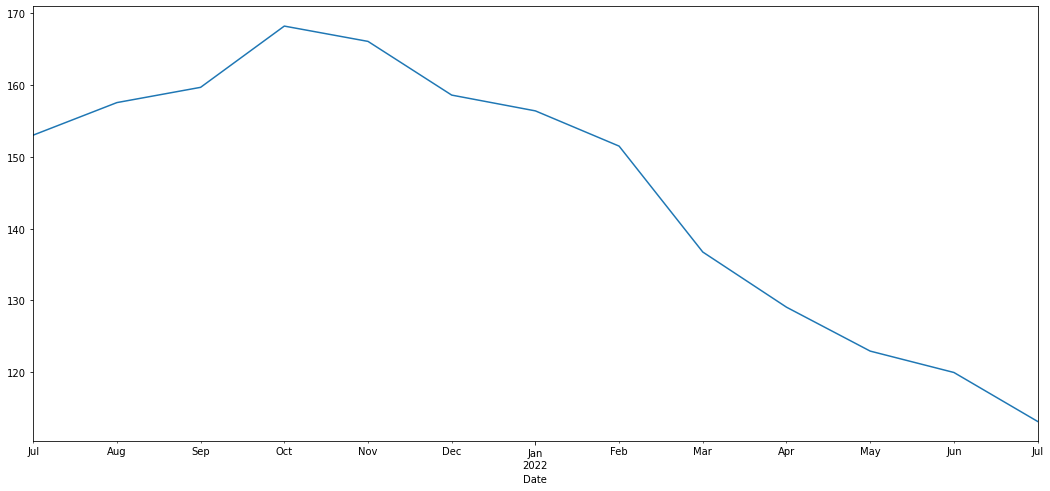

In [93]:
y_test.plot()
plt.show()

#**Training Precio Acción**

In [94]:
Optimizacion_SARIMA(y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dis

,param,param_seasonal,results.aic
31,"(0, 1, 1)","(1, 1, 1, 12)",207.72


In [95]:
mododelo_Accion=sm.tsa.statespace.SARIMAX(y_train,
                              order=(0,1,1),
                              seasonal_order=(1,1,1,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1560      0.321      0.486      0.627      -0.473       0.785
ar.S.L12      -0.6552      0.625     -1.049      0.294      -1.879       0.569
ma.S.L12      -0.5336      0.938     -0.569      0.570      -2.372       1.305
sigma2        84.4394     33.841      2.495      0.013      18.113     150.766


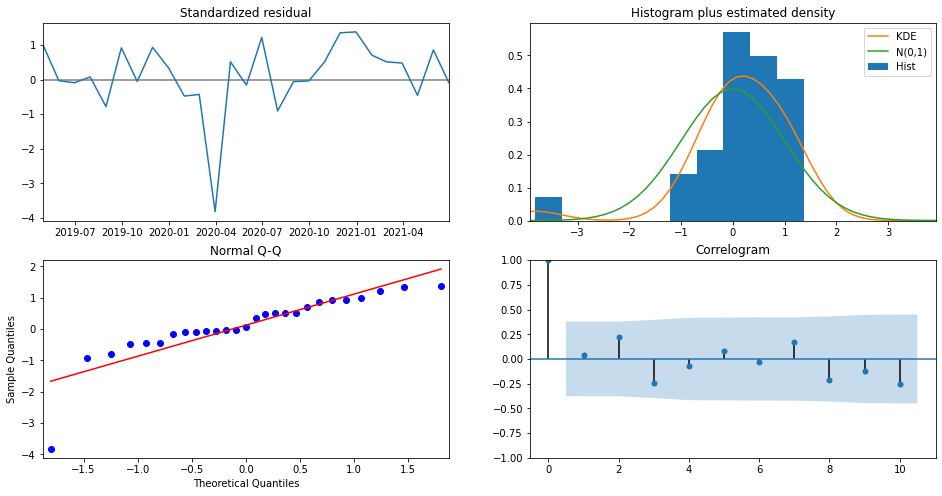

In [96]:
resultados=mododelo_Accion.fit()
print(resultados.summary().tables[1])
resultados.plot_diagnostics(figsize=(16,8))
plt.show()

**Evaluacion Training**

In [97]:
pred=resultados.get_prediction(start=pd.to_datetime("2017-01-31"),dynamic=False)

In [98]:
y_train

Date
2017-01-31    85.61
2017-02-28    88.63
2017-03-31    90.15
2017-04-30    86.29
2017-05-31    85.95
2017-06-30    86.62
2017-07-31    92.20
2017-08-31    92.09
2017-09-30    92.40
2017-10-31    98.39
2017-11-30    99.46
2017-12-31   106.28
2018-01-31   112.35
2018-02-28   114.00
2018-03-31   113.40
2018-04-30   110.42
2018-05-31   110.89
2018-06-30   107.73
2018-07-31   109.95
2018-08-31   115.58
2018-09-30   114.95
2018-10-31   109.28
2018-11-30   109.61
2018-12-31    99.85
2019-01-31   101.88
2019-02-28   104.01
2019-03-31   103.27
2019-04-30   109.96
2019-05-31   111.20
2019-06-30   109.53
2019-07-31   114.57
2019-08-31   108.41
2019-09-30   116.67
2019-10-31   119.56
2019-11-30   129.98
2019-12-31   136.13
2020-01-31   136.40
2020-02-29   133.64
2020-03-31    96.78
2020-04-30    92.09
2020-05-31    91.52
2020-06-30   100.59
2020-07-31    96.73
2020-08-31    99.71
2020-09-30    98.23
2020-10-31    99.99
2020-11-30   113.40
2020-12-31   122.08
2021-01-31   134.02
2021-02-28   14

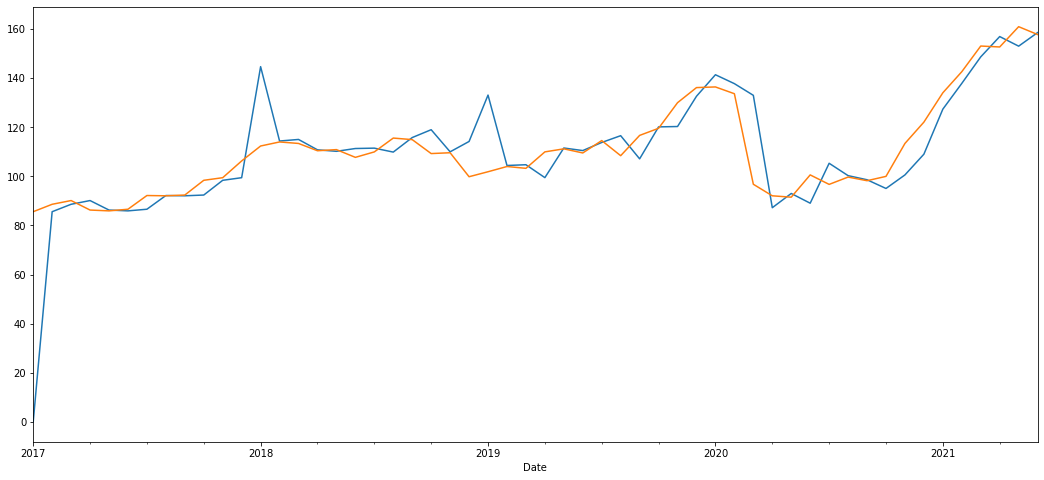

In [99]:
pred.predicted_mean.plot()
y_train.plot()

In [100]:

Resultado_train=pd.concat([pd.DataFrame(y_train),pd.DataFrame(pred.predicted_mean)],axis=1)

In [101]:
Resultado_train.head()

,Close,0
Date,,
2017-01-31,85.61,0.00
2017-02-28,88.63,85.61
2017-03-31,90.15,88.63
2017-04-30,86.29,90.15
2017-05-31,85.95,86.29


In [102]:
Resultado_train.columns=["Real","Pronostico"]

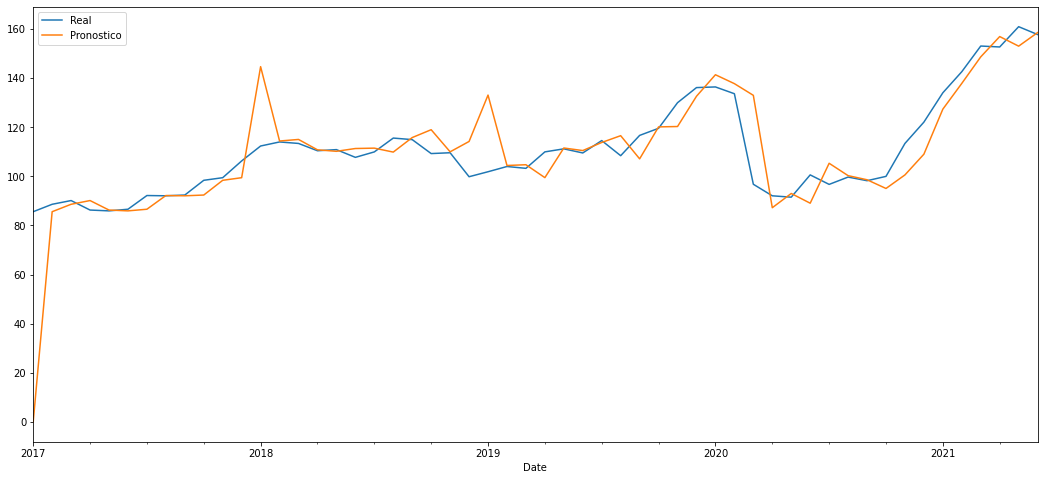

In [103]:
Resultado_train.plot()
plt.show()

#**Métricas de Error**

##**MAPE: error porcentual absoluto medio**

El error porcentual absoluto medio (MAPE) expresa la exactitud como un porcentaje del error. Debido a que el MAPE es un porcentaje, puede ser más fácil de entender que otros estadísticos de medición de exactitud. Por ejemplo, si el MAPE es 5, en promedio, el pronóstico está errado en un 5%.

Sin embargo, es posible que algunas veces observe un valor de MAPE muy elevado aunque el modelo parezca ajustarse a los datos adecuadamente. Examine la gráfica para ver si los valores de los datos se aproximan a 0. Debido a que MAPE divide el error absoluto entre los datos reales, los valores que se aproximan a 0 pueden aumentar significativamente el MAPE.

##**RMSE**

El error cuadrático medio (RMSE) es una métrica que nos dice qué tan lejos están nuestros valores predichos de nuestros valores observados en un modelo, en promedio

##**MAE**

Mide la magnitud promedio de los errores en un conjunto de pronósticos, sin considerar su dirección. Mide la precisión de las variables continuas. Expresado en palabras, el MAE es el promedio sobre la muestra de verificación de los valores absolutos de las diferencias entre el pronóstico y la observación correspondiente. El MAE es una puntuación lineal, lo que significa que todas las diferencias individuales se ponderan por igual en la media.

In [104]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

from sklearn.metrics import mean_absolute_error as MAE

def rmse (actual, pred):
    actual, pred = np.array (actual), np.array (pred)
    return np.sqrt (np.square (np.subtract (actual, pred)). mean ())

In [105]:
Actual=Resultado_train.Real
Prediccion=Resultado_train.Pronostico
MapeTrain=MAPE(Actual,Prediccion)
print(MapeTrain)
RMSETrain=rmse(Actual,Prediccion)
print(RMSETrain)
MaeTrain=MAE(Actual,Prediccion)
print(MaeTrain)

7.130016667684942
15.110843998673383
7.329811015320062


#**Evaluación Pronostico a 12 Meses**

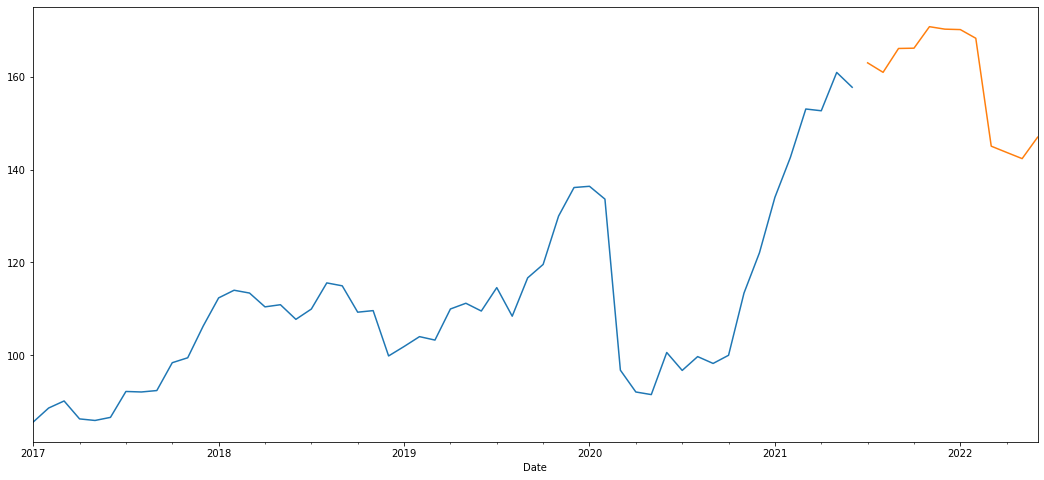

In [106]:
Pred_uc=resultados.get_forecast(steps=12)
y_train.plot(label="Observado")
Pred_uc.predicted_mean.plot()

In [107]:
y_train

Date
2017-01-31    85.61
2017-02-28    88.63
2017-03-31    90.15
2017-04-30    86.29
2017-05-31    85.95
2017-06-30    86.62
2017-07-31    92.20
2017-08-31    92.09
2017-09-30    92.40
2017-10-31    98.39
2017-11-30    99.46
2017-12-31   106.28
2018-01-31   112.35
2018-02-28   114.00
2018-03-31   113.40
2018-04-30   110.42
2018-05-31   110.89
2018-06-30   107.73
2018-07-31   109.95
2018-08-31   115.58
2018-09-30   114.95
2018-10-31   109.28
2018-11-30   109.61
2018-12-31    99.85
2019-01-31   101.88
2019-02-28   104.01
2019-03-31   103.27
2019-04-30   109.96
2019-05-31   111.20
2019-06-30   109.53
2019-07-31   114.57
2019-08-31   108.41
2019-09-30   116.67
2019-10-31   119.56
2019-11-30   129.98
2019-12-31   136.13
2020-01-31   136.40
2020-02-29   133.64
2020-03-31    96.78
2020-04-30    92.09
2020-05-31    91.52
2020-06-30   100.59
2020-07-31    96.73
2020-08-31    99.71
2020-09-30    98.23
2020-10-31    99.99
2020-11-30   113.40
2020-12-31   122.08
2021-01-31   134.02
2021-02-28   14

In [108]:
Pred_uc.predicted_mean

2021-07-31   162.99
2021-08-31   160.95
2021-09-30   166.09
2021-10-31   166.15
2021-11-30   170.78
2021-12-31   170.25
2022-01-31   170.15
2022-02-28   168.28
2022-03-31   145.04
2022-04-30   143.69
2022-05-31   142.36
2022-06-30   146.97
Freq: M, dtype: float64

#**Comparar Real con Pronostico**

In [109]:
y_test

Date
2021-07-31   153.03
2021-08-31   157.57
2021-09-30   159.69
2021-10-31   168.23
2021-11-30   166.10
2021-12-31   158.61
2022-01-31   156.41
2022-02-28   151.50
2022-03-31   136.74
2022-04-30   129.05
2022-05-31   122.93
2022-06-30   119.95
2022-07-31   113.13
Freq: M, Name: Close, dtype: float64

In [110]:
Resultado_test=pd.concat([pd.DataFrame(y_test),pd.DataFrame(Pred_uc.predicted_mean)],axis=1)
Resultado_test.columns=["Real","Pronostico"]

In [111]:
Resultado_test

,Real,Pronostico
2021-07-31,153.03,162.99
2021-08-31,157.57,160.95
2021-09-30,159.69,166.09
2021-10-31,168.23,166.15
2021-11-30,166.10,170.78
2021-12-31,158.61,170.25
2022-01-31,156.41,170.15
2022-02-28,151.50,168.28
2022-03-31,136.74,145.04
2022-04-30,129.05,143.69


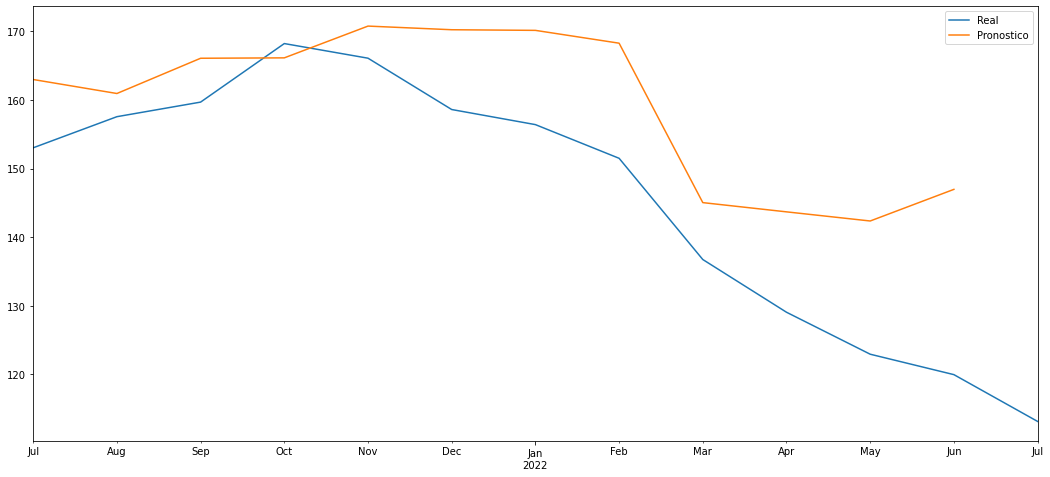

In [112]:
Resultado_test.plot()
plt.show()

#**Error Test**

In [113]:
Actual=Resultado_test.Real
Prediccion=Resultado_test.Pronostico
MapeTest=MAPE(Actual,Prediccion)
print("MAPE: ",MapeTest)
RMSETest=rmse(Actual,Prediccion)
print("RMSE" ,RMSETest)
MaeTest=MAE(Actual,Prediccion)
print("MAE: ", MaeTest)

MAPE:  8.30401185368481
RMSE nan


ValueError: ignored

#**Con Todos los datos**

In [ ]:

#Optimizacion_SARIMA(y)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1472      0.256      0.575      0.565      -0.355       0.649
ar.S.L12      -0.4812      0.314     -1.535      0.125      -1.096       0.133
ma.S.L12      -1.0001   1849.153     -0.001      1.000   -3625.273    3623.273
sigma2        49.3119   9.12e+04      0.001      1.000   -1.79e+05    1.79e+05


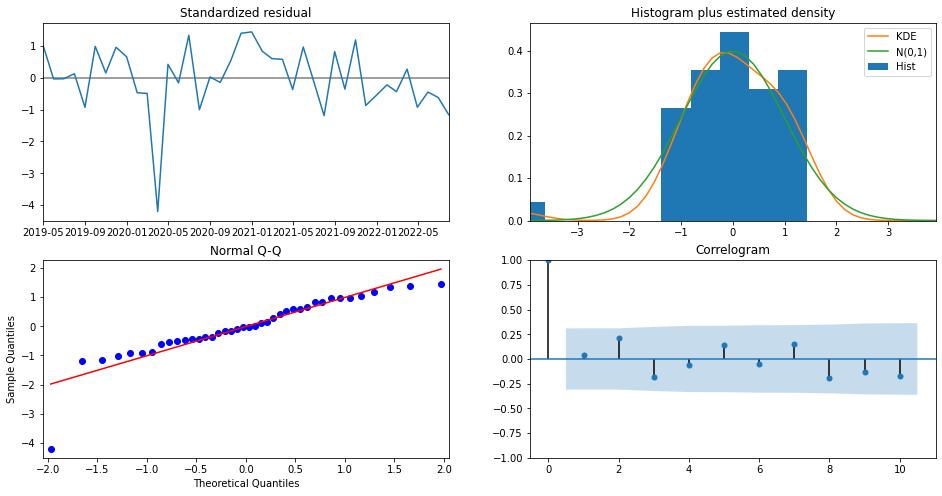

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2022-08-31 to 2023-07-31
Freq: M
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Proyeccion  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes
            Proyeccion
2022-08-31      111.63
2022-09-30      113.46
2022-10-31      111.82
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67 entries, 2017-01-31 to 2022-07-31
Freq: M
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Proyeccion  67 non-null     float64
dtypes: float64(1)
memory usage: 3.1 KB
            Proyeccion
Date                  
2017-01-31       85.61
2017-02-28       88.63
2017-03-31       90.15


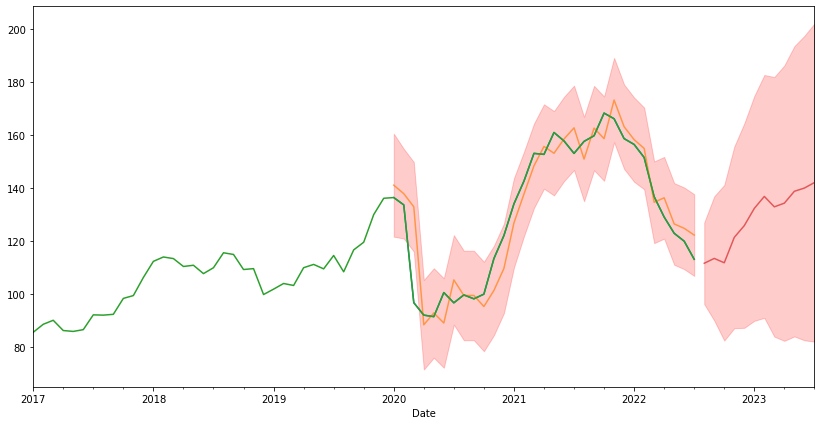

In [114]:
mod=sm.tsa.statespace.SARIMAX(y,
                              order=(0,1,1),
                              seasonal_order=(1,1,1,12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)

resultados=mod.fit()
print(resultados.summary().tables[1])
resultados.plot_diagnostics(figsize=(16,8))
plt.show()

pred=resultados.get_prediction(start=pd.to_datetime("2020-01-31"),dynamic=False)
pred_ci=pred.conf_int()
ax=y["2020":].plot(label="Observado")
pred.predicted_mean.plot(ax=ax,label="Prediccion",alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color="r",alpha=.2)

Pred_uc=resultados.get_forecast(steps=12)
pred_ci=Pred_uc.conf_int()
ax=y.plot(label="Observado")
Pred_uc.predicted_mean.plot(ax=ax,label="Prediccion",alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color="r",alpha=.2)

proy = Pred_uc.predicted_mean
proy = pd.DataFrame(proy)
proy.columns = ['Proyeccion']
proy.info()
print(proy.head(3))

## Valores reales
y_truth = y
proy1 = pd.DataFrame(y_truth)
proy1.columns = ['Proyeccion']
proy1.info()
print(proy1.head(3))

data = pd.concat([proy1,proy])
data.tail(13)

fig=px.line(data,y="Proyeccion",title="Evolución Diaria Precio de Acción de JP Morgan")
## Botones
fig.show()

In [ ]:
data.to_excel("PronosticoAPPl.xlsx")